In [1]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sklearn

# Data Preparation

In [2]:
df = pd.read_csv('data/creditcard.csv')

In [3]:
# displaying data 5 row only
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Understanding the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.shape   # knowing the shape of the data 

(284807, 31)

In [6]:
df.columns   # knowing the columns of the data 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
#Data Class Balance Check
print('Fraud Percentage: {}'.format(round((df['Class'].value_counts()[1]/len(df))*100,2)))
print('Non Fraud Percentage: {}'.format(round((df['Class'].value_counts()[0]/len(df))*100,2)))

Fraud Percentage: 0.17
Non Fraud Percentage: 99.83


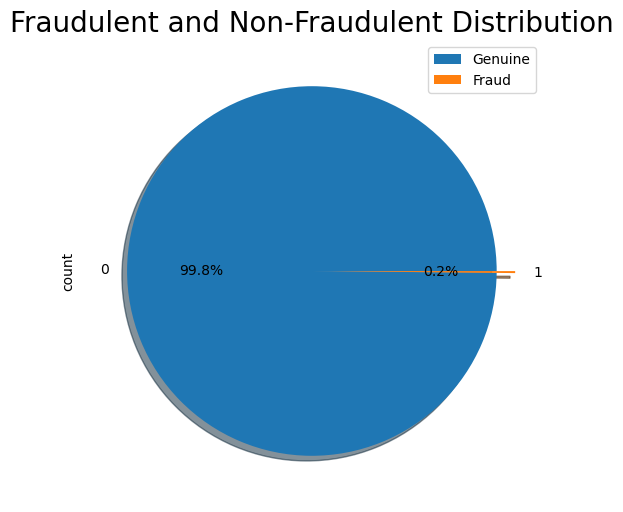

In [8]:
df["Class"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Genuine","Fraud"])
plt.show()

# Finding null values

In [9]:
# Dealing with missing data
df.isnull().sum().max()

0

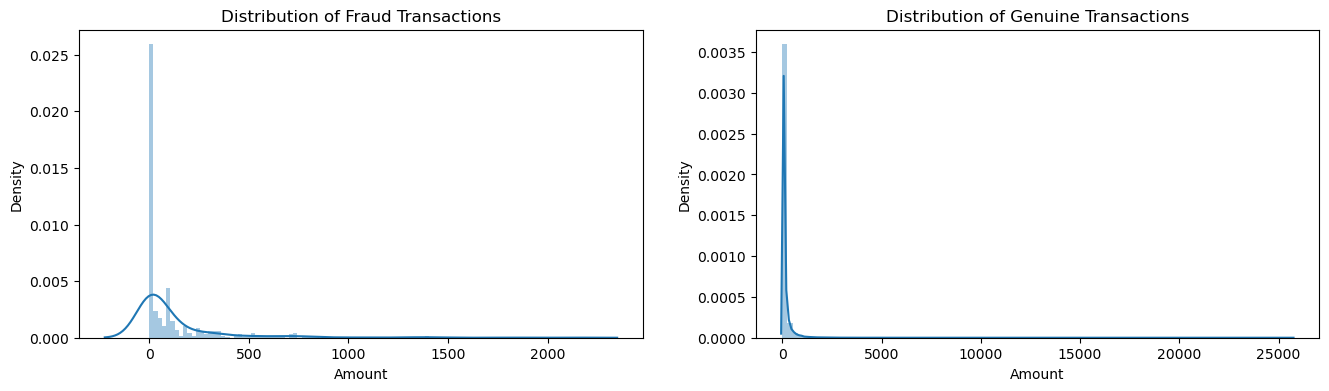

In [10]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df[df['Class'] == 1]['Amount'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[df['Class'] == 0]['Amount'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

# Highlights

This graph shows that most of the fraud transaction amount is less than 500 dollars. This also shows that the fraud transaction is very high for an amount near to 0, let's find that amount.

In [11]:
print("Fraud Transaction distribution : \n",df[(df['Class'] == 1)]['Amount'].value_counts().head())
print("\n")
print("Maximum amount of fraud transaction - ",df[(df['Class'] == 1)]['Amount'].max())
print("Minimum amount of fraud transaction - ",df[(df['Class'] == 1)]['Amount'].min())

Fraud Transaction distribution : 
 Amount
1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: count, dtype: int64


Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.0


# Highlights

There are 113 fraud transactions for just one dollor and 27 fraud transaction for $99.99. And higest fraud transaction amount was 2125.87 and lowest was just 0.00.

In [12]:
print("Genuine Transaction distribution : \n",df[(df['Class'] == 0)]['Amount'].value_counts().head())
print("\n")
print("Maximum amount of Genuine transaction - ",df[(df['Class'] == 0)]['Amount'].max())
print("Minimum amount of Genuine transaction - ",df[(df['Class'] == 0)]['Amount'].min())

Genuine Transaction distribution : 
 Amount
1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
Name: count, dtype: int64


Maximum amount of Genuine transaction -  25691.16
Minimum amount of Genuine transaction -  0.0


# Distribution of Time

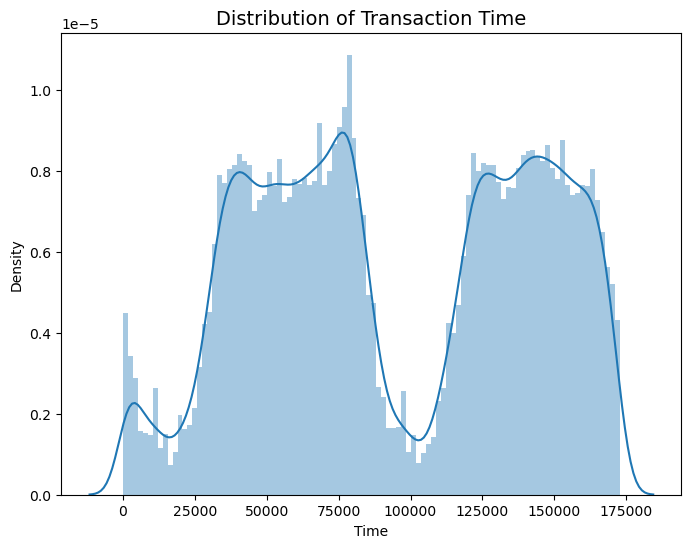

In [13]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(df['Time'], bins=100)
plt.show()

Highlights

By seeing the graph, we can see there are two peaks in the graph and even there are some local peaks. We can think of these as the time of the day like the peak is the day time when most people do the transactions and the depth is the night time when most people just sleeps. We already know that data contains a credit card transaction for only two days, so there are two peaks for day time and one depth for one night time.

# Distribution of time w.r.t. transactions types

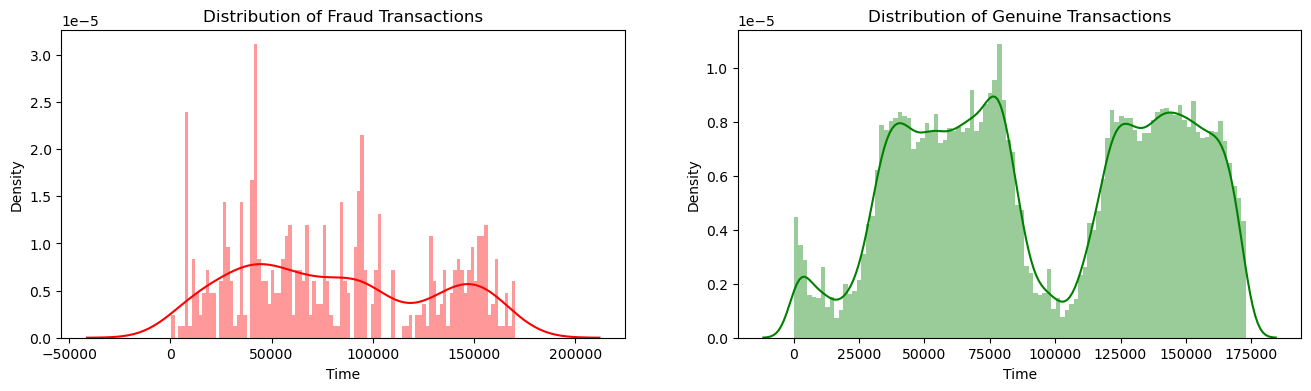

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['Class'] == 1)]['Time'], bins=100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['Class'] == 0)]['Time'], bins=100, color='green', ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")

plt.show()

In [15]:
df[['Time','Amount','Class']].corr()['Class'].sort_values(ascending=False).head(10)

Class     1.000000
Amount    0.005632
Time     -0.012323
Name: Class, dtype: float64

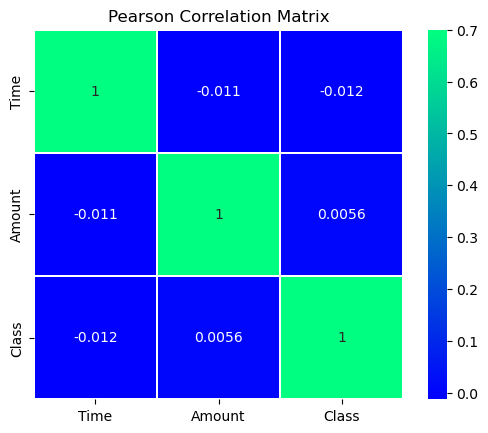

In [16]:
plt.title('Pearson Correlation Matrix')
sns.heatmap(df[['Time', 'Amount','Class']].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="winter",
            linecolor='w',annot=True);

# Highlights

It looks like that no features are highly correlated with any other features.

# Lets check the data again after cleaning

In [17]:
df.shape

(284807, 31)

In [18]:
df['Class'].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

# Feature Engineering

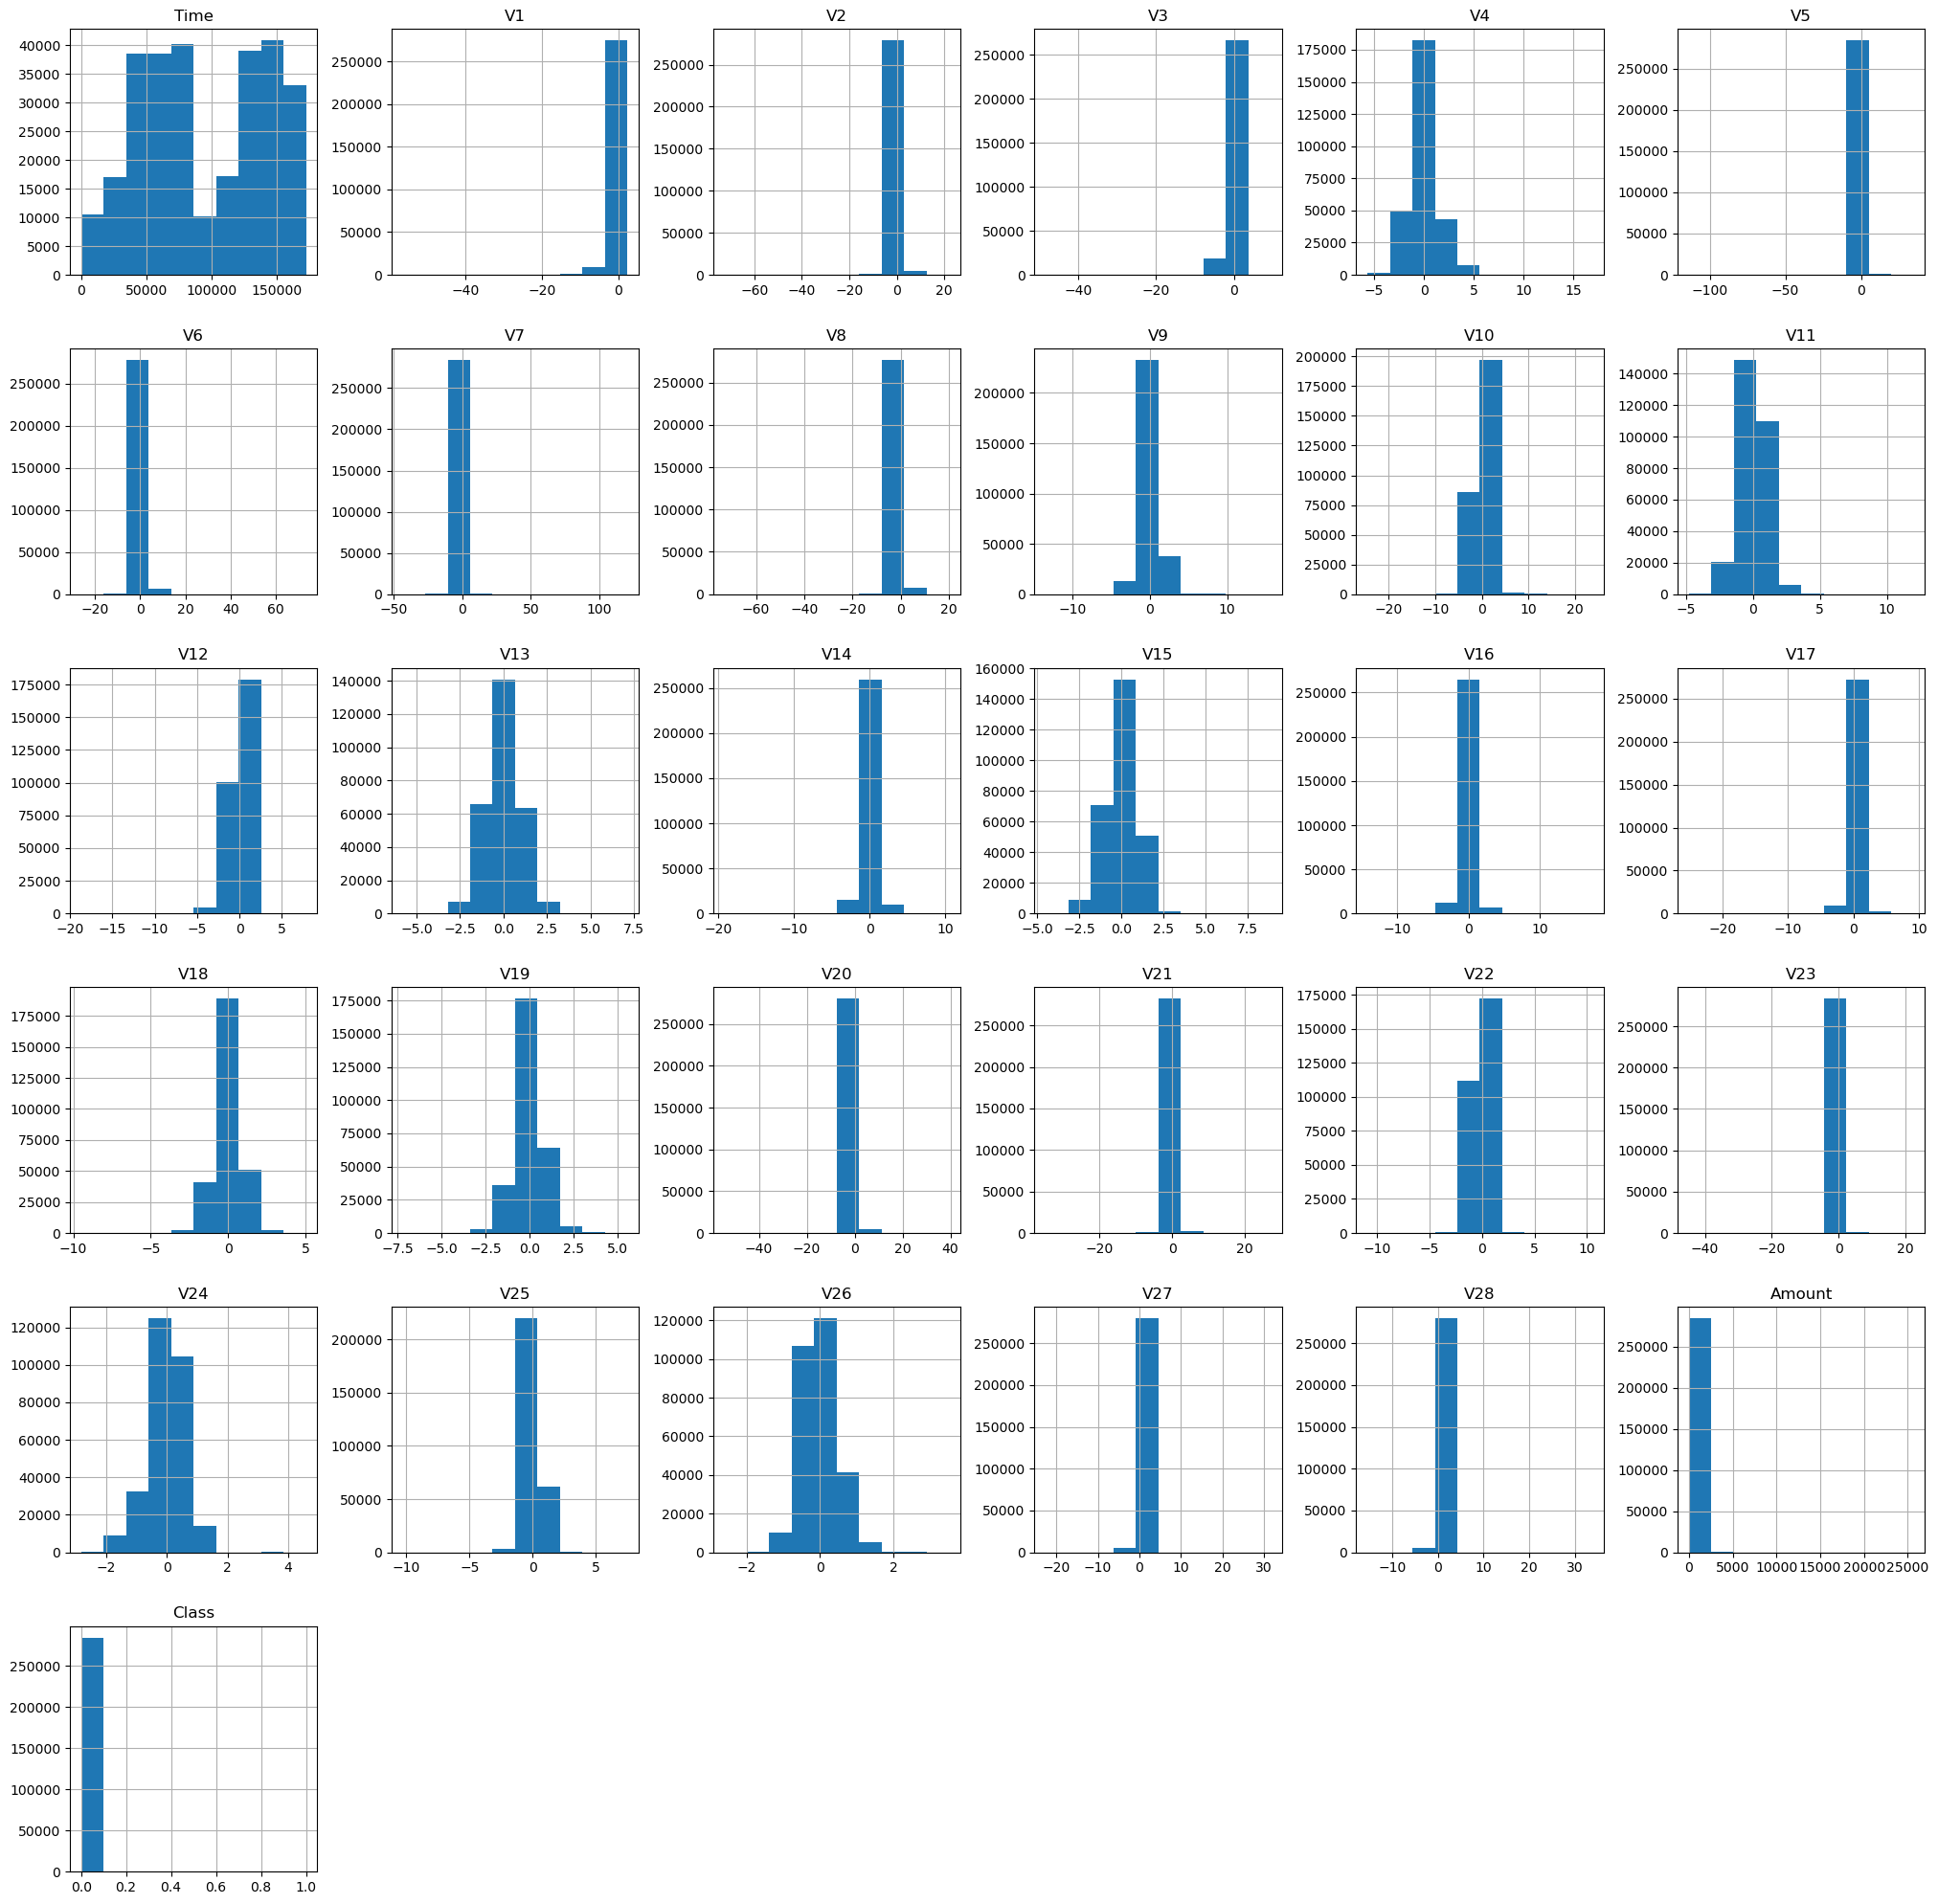

In [19]:
df.hist(figsize = (25,25))
plt.show()

# Reset the index

In [20]:
df.reset_index(inplace = True , drop = True)

# Scale Amount Feature
It is a good idea to scale the data so that the column(feature) with lesser significance might not end up dominating the objective function due to its larger range. like a column like age has a range between 0 to 80, but a column like a salary has ranged from thousands to lakhs, hence, salary column will dominate to predict the outcome even if it may not be important.
In addition, features having different unit should also be scaled thus providing each feature equal initial weightage. Like Age in years and Sales in Dollars must be brought down to a common scale before feeding it to the ML algorithm
This will result in a better prediction model.
PCA Transformation: The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) except for time and amount.

Scaling: Keep in mind that in order to implement a PCA transformation features need to be previously scaled.

# Scale amount by Log
Scaling using the log: There are two main reasons to use logarithmic scales in charts and graphs.
The first is to respond to skewness towards large values; i.e., cases in which one or a few points are much larger than the bulk of the data.
The second is to show per cent change or multiplicative factors.

In [21]:
# Scale amount by log
df['amount_log'] = np.log(df.Amount + 0.01)

# Scale amount by Standardization
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [22]:
from sklearn.preprocessing import StandardScaler # importing a class from a module of a library

stand_scaler = StandardScaler() # object of the class StandardScaler ()
df['amount_scaled'] = stand_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

# Scale amount by Normalization
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

In [23]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler() # object of the class StandardScaler ()
df['amount_minmax'] = minmax.fit_transform(df['Amount'].values.reshape(-1,1))

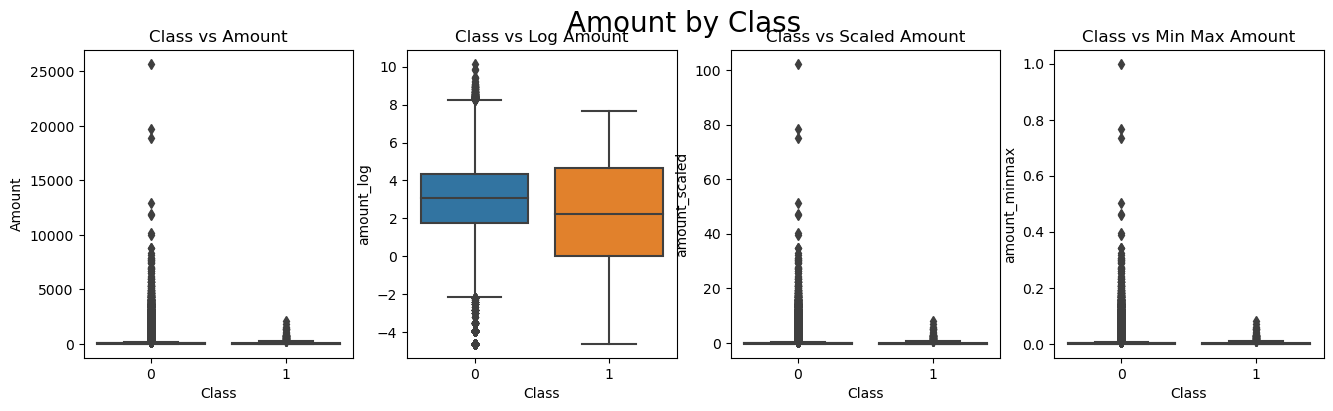

In [24]:
#Feature engineering to a better visualization of the values

# Let's explore the Amount by Class and see the distribuition of Amount transactions
fig , axs = plt.subplots(nrows = 1 , ncols = 4 , figsize = (16,4))

sns.boxplot(x ="Class",y="Amount",data=df, ax = axs[0])
axs[0].set_title("Class vs Amount")

sns.boxplot(x ="Class",y="amount_log",data=df, ax = axs[1])
axs[1].set_title("Class vs Log Amount")

sns.boxplot(x ="Class",y="amount_scaled",data=df, ax = axs[2])
axs[2].set_title("Class vs Scaled Amount")

sns.boxplot(x ="Class",y="amount_minmax",data=df, ax = axs[3])
axs[3].set_title("Class vs Min Max Amount")

fig.suptitle('Amount by Class', fontsize=20)
plt.show()

# Hightlights

We can see a slight difference in the log amount of our two Classes.
The IQR of fraudulent transactions are higher than normal transactions, but normal transactions have the highest values.
By seeing the above three graphs, I think scaling the amount by log will best suit for our model.

# Saving preprossed data as serialized files

In [25]:
import pickle
import os
CreditCardFraudDataCleaned = df

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final Data set after all the transformations as a file
with open('CreditCardFraudDataCleaned.pkl', 'wb') as fileWriteStream:
    pickle.dump(CreditCardFraudDataCleaned, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file is saved at Location:',os.getcwd())

pickle file is saved at Location: C:\Users\SUFIYAN MOBIN SHAIKH


In [26]:
# Reading a Pickle file
with open('CreditCardFraudDataCleaned.pkl', 'rb') as fileReadStream:
    CreditCardFraudDataFromPickle = pickle.load(fileReadStream)
    # Don't forget to close the filestream!
    fileReadStream.close()
    
# Checking the data read from pickle file. It is exactly same as the DiamondPricesData
df = CreditCardFraudDataFromPickle
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,amount_log,amount_scaled,amount_minmax
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.008166,0.244964,0.005824
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.993252,-0.342475,0.000105
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.936665,1.160686,0.014739
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.816322,0.140534,0.004807
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.248495,-0.073403,0.002724


In [27]:
df.shape

(284807, 34)

In [28]:
# Separate Target Variable and Predictor Variables
# Here I am keeping the log amount and dropping the amount and scaled amount columns.
X = df.drop(['Time','Class','Amount'],axis=1)
y = df['Class']

In [29]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,amount_log,amount_scaled,amount_minmax
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008166,0.244964,0.005824
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.993252,-0.342475,0.000105
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936665,1.160686,0.014739
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816322,0.140534,0.004807
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248495,-0.073403,0.002724


In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

# Splitting data into Training and Testing samples
We don't use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 80% of data is used as training data and the rest 20% is used as testing data.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [32]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (227845, 31)
y_train -  (227845,)
X_test -  (56962, 31)
y_test -  (56962,)


# Baseline for models
We will train three types of classifiers and decide which classifier will be more effective in detecting fraud transactions.

# Model Building

We are aware that our dataset is highly imbalanced, however, we check the performance of imbalance dataset first and later we implement some techniques to balance the dataset and again check the performance of balanced dataset. Finally, we will compare each regression models performance.

# Logistic Regression with imbalanced data

In [33]:
from sklearn.linear_model import LogisticRegression 

In [34]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

LogisticRegression()

Predict from Test set

In [35]:
y_pred = logreg.predict(X_test)

# Model Evolution

In [36]:
from sklearn import metrics

In [37]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [38]:
print('Accuracy :{0:0.3f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.3f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.3f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.3f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.3f}'.format(metrics.f1_score(y_test , y_pred)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

Accuracy :0.999
AUC : 0.791
Precision : 0.864
Recall : 0.582
F1 : 0.695




# Confusion Matrix
Every problem is different and derives a different set of values for a particular business use case , thus every model must be evaluated differently.

Let's get to know the terminology and Structure first

A confusion matrix is defined into four parts : { TRUE , FALSE } (Actual) ,{POSITIVE , NEGATIVE} (Predicted) Positive and Negative is what you predict , True and False is what you are told

Which brings us to 4 relations : True Positive , True Negative , False Positive , False Negative
P redicted - R ows and A ctual as C olumns



Accuracy Precision and Recall
Accuracy : The most used and classic classification metric : Suited for binary classification problems.
Accuracy=(TP+TN)(TP+TN+FP+FN)
 
Basically Rightly predicted results amongst all the results , used when the classes are balanced

Precision : What proportion of predicted positives are truly positive ? Used when we need to predict the positive thoroughly, sure about it !
Precision=(TP)(TP+FP)
 
Sensitivity or Recall : What proportion of actual positives is correctly classified ? choice when we want to capture as many positives as possible
Recall=(TP)(TP+FN)
 
F1 Score : Harmonic mean of Precision and Recall. It basically maintains a balance between the precision and recall for your classifier
F1=2∗( precision ∗ recall )( precision + recall )
 


Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.

In reference of our case:

Recall (True Positive Rate): % of all fraudulent transactions cases captured.

Precision: Out of all items labeled as fraud, what percentage of them is actually fraud?

Accuracy: How correct the model is (misleading for fraud/imbalanced data)

F1 score: combination of recall and precision into one metric. F1 score is the weighted average of precision and recall, taking BOTH false positives and false negatives into account. Usually much more useful than accuracy, especially with uneven classes.

In [39]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[56855,     9],
       [   41,    57]], dtype=int64)

In [40]:
conf_mx = metrics.confusion_matrix(y_test,y_pred)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

TN:  56855
FP:  9
FN:  41
TP:  57
recall =  0.582 precision =  0.864
F1 =  0.695


f1=0.695


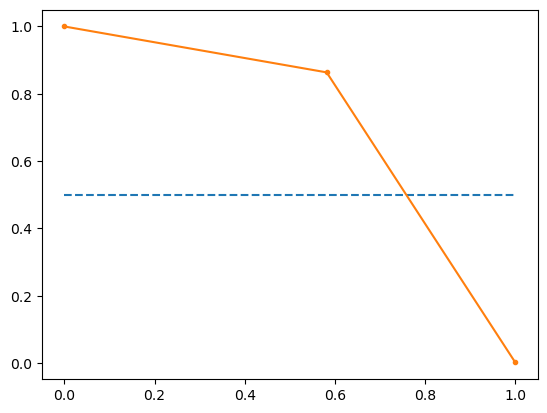

In [41]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)
print('f1=%.3f' % (f1))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

# Receiver Operating Characteristics (ROC)
The ROC is a performance measurement for classification problems at various thresholds. It is essentially a probability curve, and the higher the Area Under the Curve (AUC) score the better the model is at predicting fraudulent/non-fraudulent transactions.

It is an evaluation metric that helps identify the strength of the model to distinguish between two outcomes. It defines if a model can create a clear boundary between the postive and the negative class.

In [42]:
metrics.roc_auc_score(y_test , y_pred) 

0.7907371903460314

In [43]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[1.62843552e-08, 9.99999984e-01],
       [9.99929762e-01, 7.02377814e-05],
       [9.99951616e-01, 4.83841477e-05],
       ...,
       [9.99619138e-01, 3.80861648e-04],
       [9.99946178e-01, 5.38220287e-05],
       [9.98854377e-01, 1.14562286e-03]])

AUC -  0.7907371903460314 



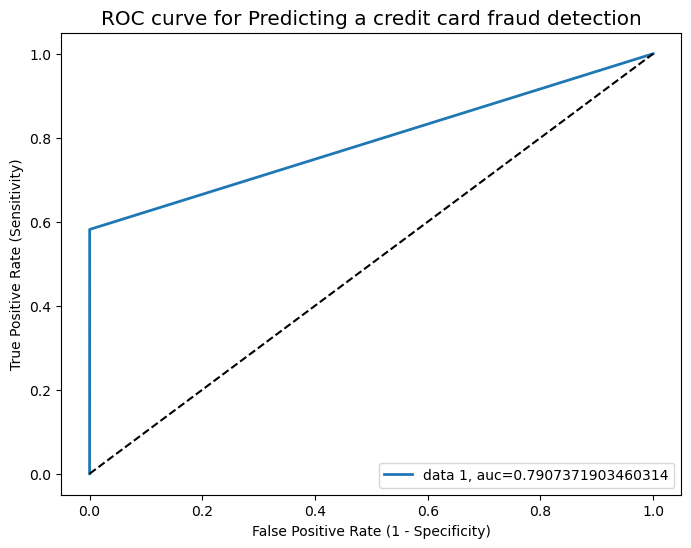

In [44]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# Class Imbalance
Imbalanced data typically refers to a problem with classification problems where the classes are not represented equally. If one applies classifiers on the dataset, they are likely to predict everything as the majority class. This was often regarded as a problem in learning from highly imbalanced datasets.

Let's Fix the class Imbalance and apply some sampling techniques.

# Under Sampling and Over Sampling
Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set.
1.Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.
2.Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.

# Synthetic Minority OverSampling Technique (SMOTE)
In this technique, instead of simply duplicating data from the minority class, we synthesize new data from the minority class. This is a type of data augmentation for tabular data can be very effective. This approach to synthesizing new data is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short.



# Adaptive Synthetic Sampling Method for Imbalanced Data (ADASYN)¶
ADASYN (Adaptive Synthetic) is an algorithm that generates synthetic data, and its greatest advantages are not copying the same minority data, and generating more data for “harder to learn” examples.

# Import imbalace technique algorithms

In [45]:
# Import imbalace technique algorithims
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

# 1.2.Logistic Regression with Random Undersampling technique

In [46]:
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

In [47]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (199364, 31)
y_train -  (199364,)
X_test -  (85443, 31)
y_test -  (85443,)


In [48]:
# Undersampling only on train

print('Original dataset shape %s' % Counter(y_train))
random_state = 42

rus = RandomUnderSampler(random_state=random_state)
X_res, y_res = rus.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

Original dataset shape Counter({0: 199019, 1: 345})
Resampled dataset shape Counter({0: 345, 1: 345})
X_train -  (690, 31)
y_train -  (690,)
X_test -  (85443, 31)
y_test -  (85443,)


In [49]:
# Undersampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [50]:
conf_mx = metrics.confusion_matrix(y_test,y_pred)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

TN:  83085
FP:  2211
FN:  13
TP:  134
recall =  0.912 precision =  0.057
F1 =  0.108


In [51]:
print('Accuracy :{0:0.3f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.3f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.3f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.3f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.3f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.974
AUC : 0.943
Precision : 0.057
Recall : 0.912
F1 : 0.108


f1=0.108


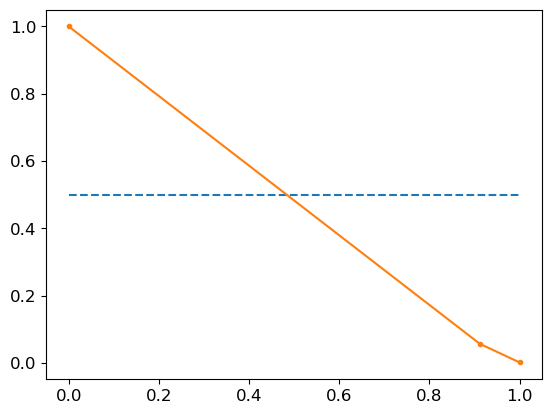

In [52]:
Accuracy :0.97397
AUC : 0.94282
Precision : 0.05714
Recall : 0.91156
F1 : 0.10754
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# calculate F1 score
f1 = metrics.f1_score(y_test, y_pred)
print('f1=%.3f' % (f1))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

# 1.3.Logistic Regression with Random Oversampling technique

In [53]:
from imblearn.over_sampling import RandomOverSampler

Modified the original nb so the test is separated BEFORE any oversampling - to prevent data leakage
Identical samples in the train AND test = data leakage....

Oversampling is performed ONLY on train

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (227845, 31)
y_train -  (227845,)
X_test -  (56962, 31)
y_test -  (56962,)


In [55]:
# Oversampling only on train

print('Original dataset shape %s' % Counter(y_train))
random_state = 42

ros = RandomOverSampler(random_state=random_state)
X_res, y_res = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

Original dataset shape Counter({0: 227454, 1: 391})
Resampled dataset shape Counter({0: 227454, 1: 227454})
X_train -  (454908, 31)
y_train -  (454908,)
X_test -  (56962, 31)
y_test -  (56962,)


In [56]:
# Oversampling with Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [57]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.97619
AUC : 0.95348
Precision : 0.06514
Recall : 0.93069
F1 : 0.12176


F1 on test: 0.95 with data leakage vs 0.12 without


In [58]:
conf_mx = metrics.confusion_matrix(y_test,y_pred)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

TN:  55512
FP:  1349
FN:  7
TP:  94
recall =  0.931 precision =  0.065
F1 =  0.122


# 1.4 Logistic Regression with SMOTE data

In [59]:
from imblearn.over_sampling import SMOTE, ADASYN

In [60]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (227845, 31)
y_train -  (227845,)
X_test -  (56962, 31)
y_test -  (56962,)


In [61]:
# Oversampling only on train

print('Original dataset shape %s' % Counter(y_train))
random_state = 42

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

Original dataset shape Counter({0: 227454, 1: 391})
Resampled dataset shape Counter({0: 227454, 1: 227454})
X_train -  (454908, 31)
y_train -  (454908,)
X_test -  (56962, 31)
y_test -  (56962,)


In [62]:
# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [63]:
print('Accuracy :{0:0.3f}'.format(metrics.accuracy_score(y_test , y_pred))) 
print('AUC : {0:0.3f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.3f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.3f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.3f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.975
AUC : 0.958
Precision : 0.063
Recall : 0.941
F1 : 0.118


In [64]:
conf_mx = metrics.confusion_matrix(y_test,y_pred)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

TN:  55453
FP:  1408
FN:  6
TP:  95
recall =  0.941 precision =  0.063
F1 =  0.118


# 1.5 Logistic Regression with ADASYN data

In [65]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (227845, 31)
y_train -  (227845,)
X_test -  (56962, 31)
y_test -  (56962,)


In [66]:
# Oversampling only on train

print('Original dataset shape %s' % Counter(y_train))
random_state = 42

adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res

print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

Original dataset shape Counter({0: 227454, 1: 391})
Resampled dataset shape Counter({0: 227454, 1: 227436})
X_train -  (454890, 31)
y_train -  (454890,)
X_test -  (56962, 31)
y_test -  (56962,)


In [67]:
#  ADASYN Sampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [68]:
print('Accuracy :{0:0.3f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.3f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.3f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.3f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.3f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.908
AUC : 0.939
Precision : 0.018
Recall : 0.970
F1 : 0.036


In [69]:
conf_mx = metrics.confusion_matrix(y_test,y_pred)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print ('recall = ', round(recall,3), 'precision = ', round(precision,3))

F1 = 2 * recall * precision / (recall + precision)
print('F1 = ', round(F1,3))

TN:  51606
FP:  5255
FN:  3
TP:  98
recall =  0.97 precision =  0.018
F1 =  0.036


# Spatial nature of class imbalance
I will reduce 29 columns to 2 columns with the help of Principal Component Analysis so that I can look at them in a plot! (because to plot graph we need two dimensions)

In [70]:
from sklearn.decomposition import PCA

# Distribution of balaced dataset
Finally, we can create a scatter plot of the dataset and colour the examples for each class a different colour to clearly see the spatial nature of the class imbalance.

A scatter plot of the dataset is created showing the large mass of points that belong to the minority class (red) and a small number of points spread out for the minority class (blue). We can see some measure of overlap between the two classes.

In [71]:
X_reduced_pca_im = PCA(n_components=2, random_state=42).fit_transform(X)

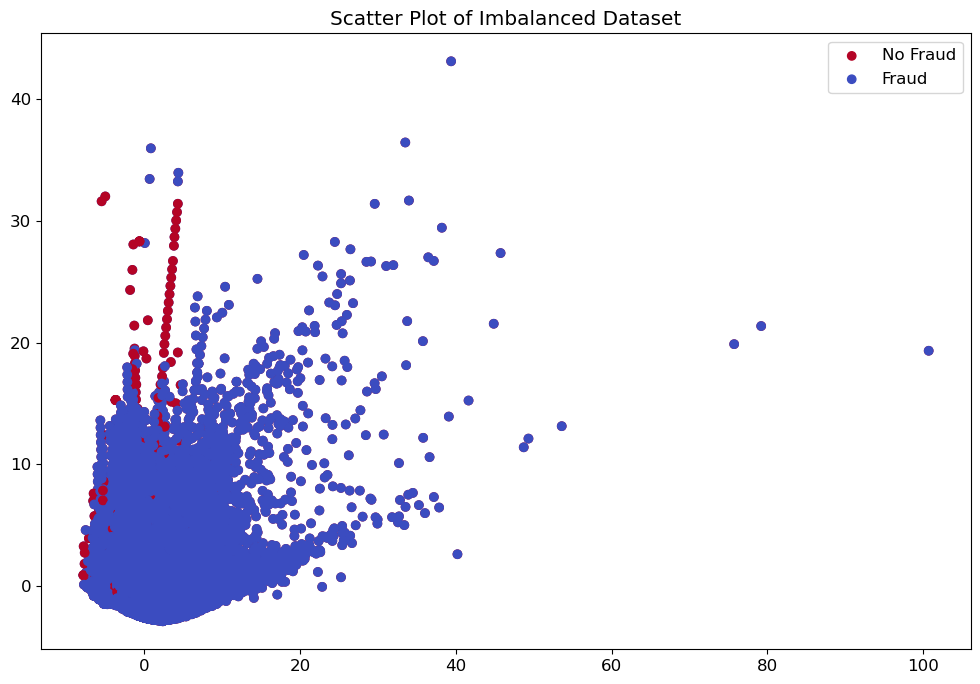

In [72]:
# Generate and plot a synthetic imbalanced classification dataset
plt.figure(figsize=(12,8))

plt.scatter(X_reduced_pca_im[:,0], X_reduced_pca_im[:,1], c=(y == 0), label='No Fraud', cmap='coolwarm', linewidths=1)
plt.scatter(X_reduced_pca_im[:,0], X_reduced_pca_im[:,1], c=(y == 1), label='Fraud', cmap='coolwarm', linewidths=1)

plt.title("Scatter Plot of Imbalanced Dataset")
plt.legend()
plt.show()

# Building different models with different balanced datasets
Let's now try different models , first by creating multiple datasets for undersampled , oversampled and SMOTE sampled

# 1. Undersampled Data

In [73]:
# Split BEFORE any under / oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)
print('-'*50)
# Oversampling only on train
#print('Original dataset shape %s' % Counter(y_train))
random_state = 42

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

X_train = X_res
y_train = y_res

# Slit into train and test datasets
X_train_under, X_test_under, y_train_under, y_test_under = X_train, X_test, y_train, y_test

print("X_train_under - ",X_train_under.shape)
print("y_train_under - ",y_train_under.shape)
print("X_test_under - ",X_test_under.shape)
print("y_test_under - ",y_test_under.shape)

X_train -  (227845, 31)
y_train -  (227845,)
X_test -  (56962, 31)
y_test -  (56962,)
--------------------------------------------------
X_train_under -  (782, 31)
y_train_under -  (782,)
X_test_under -  (56962, 31)
y_test_under -  (56962,)


In [74]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)
print('-'*50)
# Oversampling only on train
print('Original dataset shape %s' % Counter(y_train))
random_state = 42

ros = RandomOverSampler(random_state=random_state)
X_res, y_res = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res
X_train_over, X_test_over, y_train_over, y_test_over = X_train, X_test, y_train, y_test

print("X_train_over - ",X_train_over.shape)
print("y_train_over - ",y_train_over.shape)
print("X_test_over - ",X_test_over.shape)
print("y_test_over - ",y_test_over.shape)

X_train -  (227845, 31)
y_train -  (227845,)
X_test -  (56962, 31)
y_test -  (56962,)
--------------------------------------------------
Original dataset shape Counter({0: 227454, 1: 391})
Resampled dataset shape Counter({0: 227454, 1: 227454})
X_train_over -  (454908, 31)
y_train_over -  (454908,)
X_test_over -  (56962, 31)
y_test_over -  (56962,)


# SMOTE Data

In [75]:
# Split BEFORE any oversampling - prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)
print('-'*50)
# Oversampling only on train
print('Original dataset shape %s' % Counter(y_train))
random_state = 42

smote = SMOTE(random_state=42)
X_res, y_res  = smote.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res
X_train_smote, X_test_smote, y_train_smote, y_test_smote = X_train, X_test, y_train, y_test

print("X_train_smote - ",X_train_smote.shape)
print("y_train_smote - ",y_train_smote.shape)
print("X_test_smote - ",X_test_smote.shape)
print("y_test_smote - ",y_test_smote.shape)

X_train -  (227845, 31)
y_train -  (227845,)
X_test -  (56962, 31)
y_test -  (56962,)
--------------------------------------------------
Original dataset shape Counter({0: 227454, 1: 391})
Resampled dataset shape Counter({0: 227454, 1: 227454})
X_train_smote -  (454908, 31)
y_train_smote -  (454908,)
X_test_smote -  (56962, 31)
y_test_smote -  (56962,)


# ADASYN Data


In [76]:
# Split BEFORE any oversampling - prevent data leakage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)
print('-'*50)
# Oversampling only on train
print('Original dataset shape %s' % Counter(y_train))
random_state = 42

adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

X_train = X_res
y_train = y_res
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = X_train, X_test, y_train, y_test

print("X_train_adasyn - ",X_train_adasyn.shape)
print("y_train_adasyn - ",y_train_adasyn.shape)
print("X_test_adasyn - ",X_test_adasyn.shape)
print("y_test_adasyn - ",y_test_adasyn.shape)


X_train -  (227845, 31)
y_train -  (227845,)
X_test -  (56962, 31)
y_test -  (56962,)
--------------------------------------------------
Original dataset shape Counter({0: 227454, 1: 391})
Resampled dataset shape Counter({0: 227454, 1: 227436})
X_train_adasyn -  (454890, 31)
y_train_adasyn -  (454890,)
X_test_adasyn -  (56962, 31)
y_test_adasyn -  (56962,)


In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [78]:
names_lst = []

# Empty list to capture performance matrix for train set
aucs_train_lst = []
accuracy_train_lst = []
precision_train_lst = []
recall_train_lst = []
f1_train_lst = []

# Empty list to capture performance matrix for test set
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []

# Function for model building and performance measure

def build_measure_model(models):
    #plt.figure(figsize=(12,6))

    for name, model, X_train, X_test, y_train, y_test in models:
        
        names_lst.append(name)

        # split data in train test set
        X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test
        
        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_lst.append(Accuracy_train)
        
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc
        Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
        aucs_train_lst.append(Aucs_train)
        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_lst.append(Aucs_test)

        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_lst.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_lst.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_lst.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)

        print('F1 Score of '+ name +' model : {0:0.3f}'.format(F1Score_test))

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)

        print("Model Name :", name)
        
        print('Train Accuracy :{0:0.3f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.3f}'.format(Accuracy_test))
        
        print('Train AUC : {0:0.3f}'.format(Aucs_train))
        print('Test AUC : {0:0.3f}'.format(Aucs_test))
        
        print('Train Precision : {0:0.3f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.3f}'.format(PrecisionScore_test))
        
        print('Train Recall : {0:0.3f}'.format(RecallScore_train))
        print('Test Recall : {0:0.3f}'.format(RecallScore_test))
        
        print('Train F1 : {0:0.3f}'.format(F1Score_train))
        print('Test F1 : {0:0.3f}'.format(F1Score_test))
        
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")

In [79]:
#------------------ Logistic Regression (LR) ------------------#
LRmodels = []

#LRmodels.append(('LR imbalance', LogisticRegression(solver='liblinear', multi_class='ovr'),X,y))
LRmodels.append(('LR Undersampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_under, X_test_under, y_train_under, y_test_under))
LRmodels.append(('LR Oversampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_over, X_test_over, y_train_over, y_test_over))
LRmodels.append(('LR SMOTE', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_smote, X_test_smote, y_train_smote, y_test_smote))
LRmodels.append(('LR ADASYN', LogisticRegression(solver='liblinear', multi_class='ovr'),X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))

# Call function to create model and measure its performance
build_measure_model(LRmodels)

F1 Score of LR Undersampling model : 0.081
Model Name : LR Undersampling
Train Accuracy :0.948
Test Accuracy :0.961
Train AUC : 0.948
Test AUC : 0.961
Train Precision : 0.970
Test Precision : 0.042
Train Recall : 0.923
Test Recall : 0.960
Train F1 : 0.946
Test F1 : 0.081
Confusion Matrix : 
 [[54656  2205]
 [    4    97]]


F1 Score of LR Oversampling model : 0.122
Model Name : LR Oversampling
Train Accuracy :0.943
Test Accuracy :0.976
Train AUC : 0.943
Test AUC : 0.953
Train Precision : 0.974
Test Precision : 0.065
Train Recall : 0.910
Test Recall : 0.931
Train F1 : 0.941
Test F1 : 0.122
Confusion Matrix : 
 [[55512  1349]
 [    7    94]]


F1 Score of LR SMOTE model : 0.119
Model Name : LR SMOTE
Train Accuracy :0.944
Test Accuracy :0.975
Train AUC : 0.944
Test AUC : 0.958
Train Precision : 0.973
Test Precision : 0.063
Train Recall : 0.912
Test Recall : 0.941
Train F1 : 0.942
Test F1 : 0.119
Confusion Matrix : 
 [[55454  1407]
 [    6    95]]


F1 Score of LR ADASYN model : 0.036
Mode

In [80]:
#-----------------Decision Tree (DT)------------------#
DTmodels = []

dt = DecisionTreeClassifier()

#DTmodels.append(('DT imbalance', dt,X,y))
DTmodels.append(('DT Undersampling', dt, X_train_under, X_test_under, y_train_under, y_test_under))
DTmodels.append(('DT Oversampling', dt,X_train_over, X_test_over, y_train_over, y_test_over))
DTmodels.append(('DT SMOTE', dt,X_train_smote, X_test_smote, y_train_smote, y_test_smote))
DTmodels.append(('DT ADASYN', dt ,X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))

# Call function to create model and measure its performance
build_measure_model(DTmodels)

F1 Score of DT Undersampling model : 0.031
Model Name : DT Undersampling
Train Accuracy :1.000
Test Accuracy :0.898
Train AUC : 1.000
Test AUC : 0.914
Train Precision : 1.000
Test Precision : 0.016
Train Recall : 1.000
Test Recall : 0.931
Train F1 : 1.000
Test F1 : 0.031
Confusion Matrix : 
 [[51035  5826]
 [    7    94]]


F1 Score of DT Oversampling model : 0.731
Model Name : DT Oversampling
Train Accuracy :1.000
Test Accuracy :0.999
Train AUC : 1.000
Test AUC : 0.856
Train Precision : 1.000
Test Precision : 0.750
Train Recall : 1.000
Test Recall : 0.713
Train F1 : 1.000
Test F1 : 0.731
Confusion Matrix : 
 [[56837    24]
 [   29    72]]


F1 Score of DT SMOTE model : 0.564
Model Name : DT SMOTE
Train Accuracy :1.000
Test Accuracy :0.998
Train AUC : 1.000
Test AUC : 0.890
Train Precision : 1.000
Test Precision : 0.441
Train Recall : 1.000
Test Recall : 0.782
Train F1 : 1.000
Test F1 : 0.564
Confusion Matrix : 
 [[56761   100]
 [   22    79]]


F1 Score of DT ADASYN model : 0.579
Mode

In [81]:
#-----------------Random Forest (RF) ------------------#
RFmodels = []

#RFmodels.append(('RF imbalance', RandomForestClassifier(),X,y))
RFmodels.append(('RF Undersampling', RandomForestClassifier(),X_train_under, X_test_under, y_train_under, y_test_under))
RFmodels.append(('RF Oversampling', RandomForestClassifier(),X_train_over, X_test_over, y_train_over, y_test_over))
RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_train_smote, X_test_smote, y_train_smote, y_test_smote))
RFmodels.append(('RF ADASYN', RandomForestClassifier(),X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

F1 Score of RF Undersampling model : 0.090
Model Name : RF Undersampling
Train Accuracy :1.000
Test Accuracy :0.967
Train AUC : 1.000
Test AUC : 0.939
Train Precision : 1.000
Test Precision : 0.048
Train Recall : 1.000
Test Recall : 0.911
Train F1 : 1.000
Test F1 : 0.090
Confusion Matrix : 
 [[55017  1844]
 [    9    92]]


F1 Score of RF Oversampling model : 0.863
Model Name : RF Oversampling
Train Accuracy :1.000
Test Accuracy :1.000
Train AUC : 1.000
Test AUC : 0.906
Train Precision : 1.000
Test Precision : 0.921
Train Recall : 1.000
Test Recall : 0.812
Train F1 : 1.000
Test F1 : 0.863
Confusion Matrix : 
 [[56854     7]
 [   19    82]]


F1 Score of RF SMOTE model : 0.863
Model Name : RF SMOTE
Train Accuracy :1.000
Test Accuracy :1.000
Train AUC : 1.000
Test AUC : 0.921
Train Precision : 1.000
Test Precision : 0.885
Train Recall : 1.000
Test Recall : 0.842
Train F1 : 1.000
Test F1 : 0.863
Confusion Matrix : 
 [[56850    11]
 [   16    85]]


F1 Score of RF ADASYN model : 0.841
Mode

In [82]:
# Display comparison of the models performance

data = {'Model':names_lst,
       #'Accuracy_Train':accuracy_train_lst,
       #'Accuracy_Test':accuracy_test_lst,
       #'AUC_Train':aucs_train_lst,
       #'AUC_Test':aucs_test_lst,
       #'PrecisionScore_Train':precision_train_lst,
       'PrecisionScore_Test':precision_test_lst,
       #'RecallScore_Train':recall_train_lst,
       'RecallScore_Test':recall_test_lst,
       #'F1Score_Train':f1_train_lst,
       'F1Score_Test':f1_test_lst}

print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data) 
performance_df.sort_values(['F1Score_Test'],ascending=False)

Performance measures of various classifiers: 



,Model,PrecisionScore_Test,RecallScore_Test,F1Score_Test
9,RF Oversampling,0.921348,0.811881,0.863158
10,RF SMOTE,0.885417,0.841584,0.862944
11,RF ADASYN,0.872340,0.811881,0.841026
5,DT Oversampling,0.750000,0.712871,0.730964
7,DT ADASYN,0.474684,0.742574,0.579151
6,DT SMOTE,0.441341,0.782178,0.564286
1,LR Oversampling,0.065142,0.930693,0.121762
2,LR SMOTE,0.063249,0.940594,0.118528
8,RF Undersampling,0.047521,0.910891,0.090329
0,LR Undersampling,0.042137,0.960396,0.080732
